In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

In [2]:
df=pd.read_csv("train.csv")
df_original=pd.read_csv("train_dataset.csv")
df_test=pd.read_csv("test.csv")
df_test_original=pd.read_csv("train_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

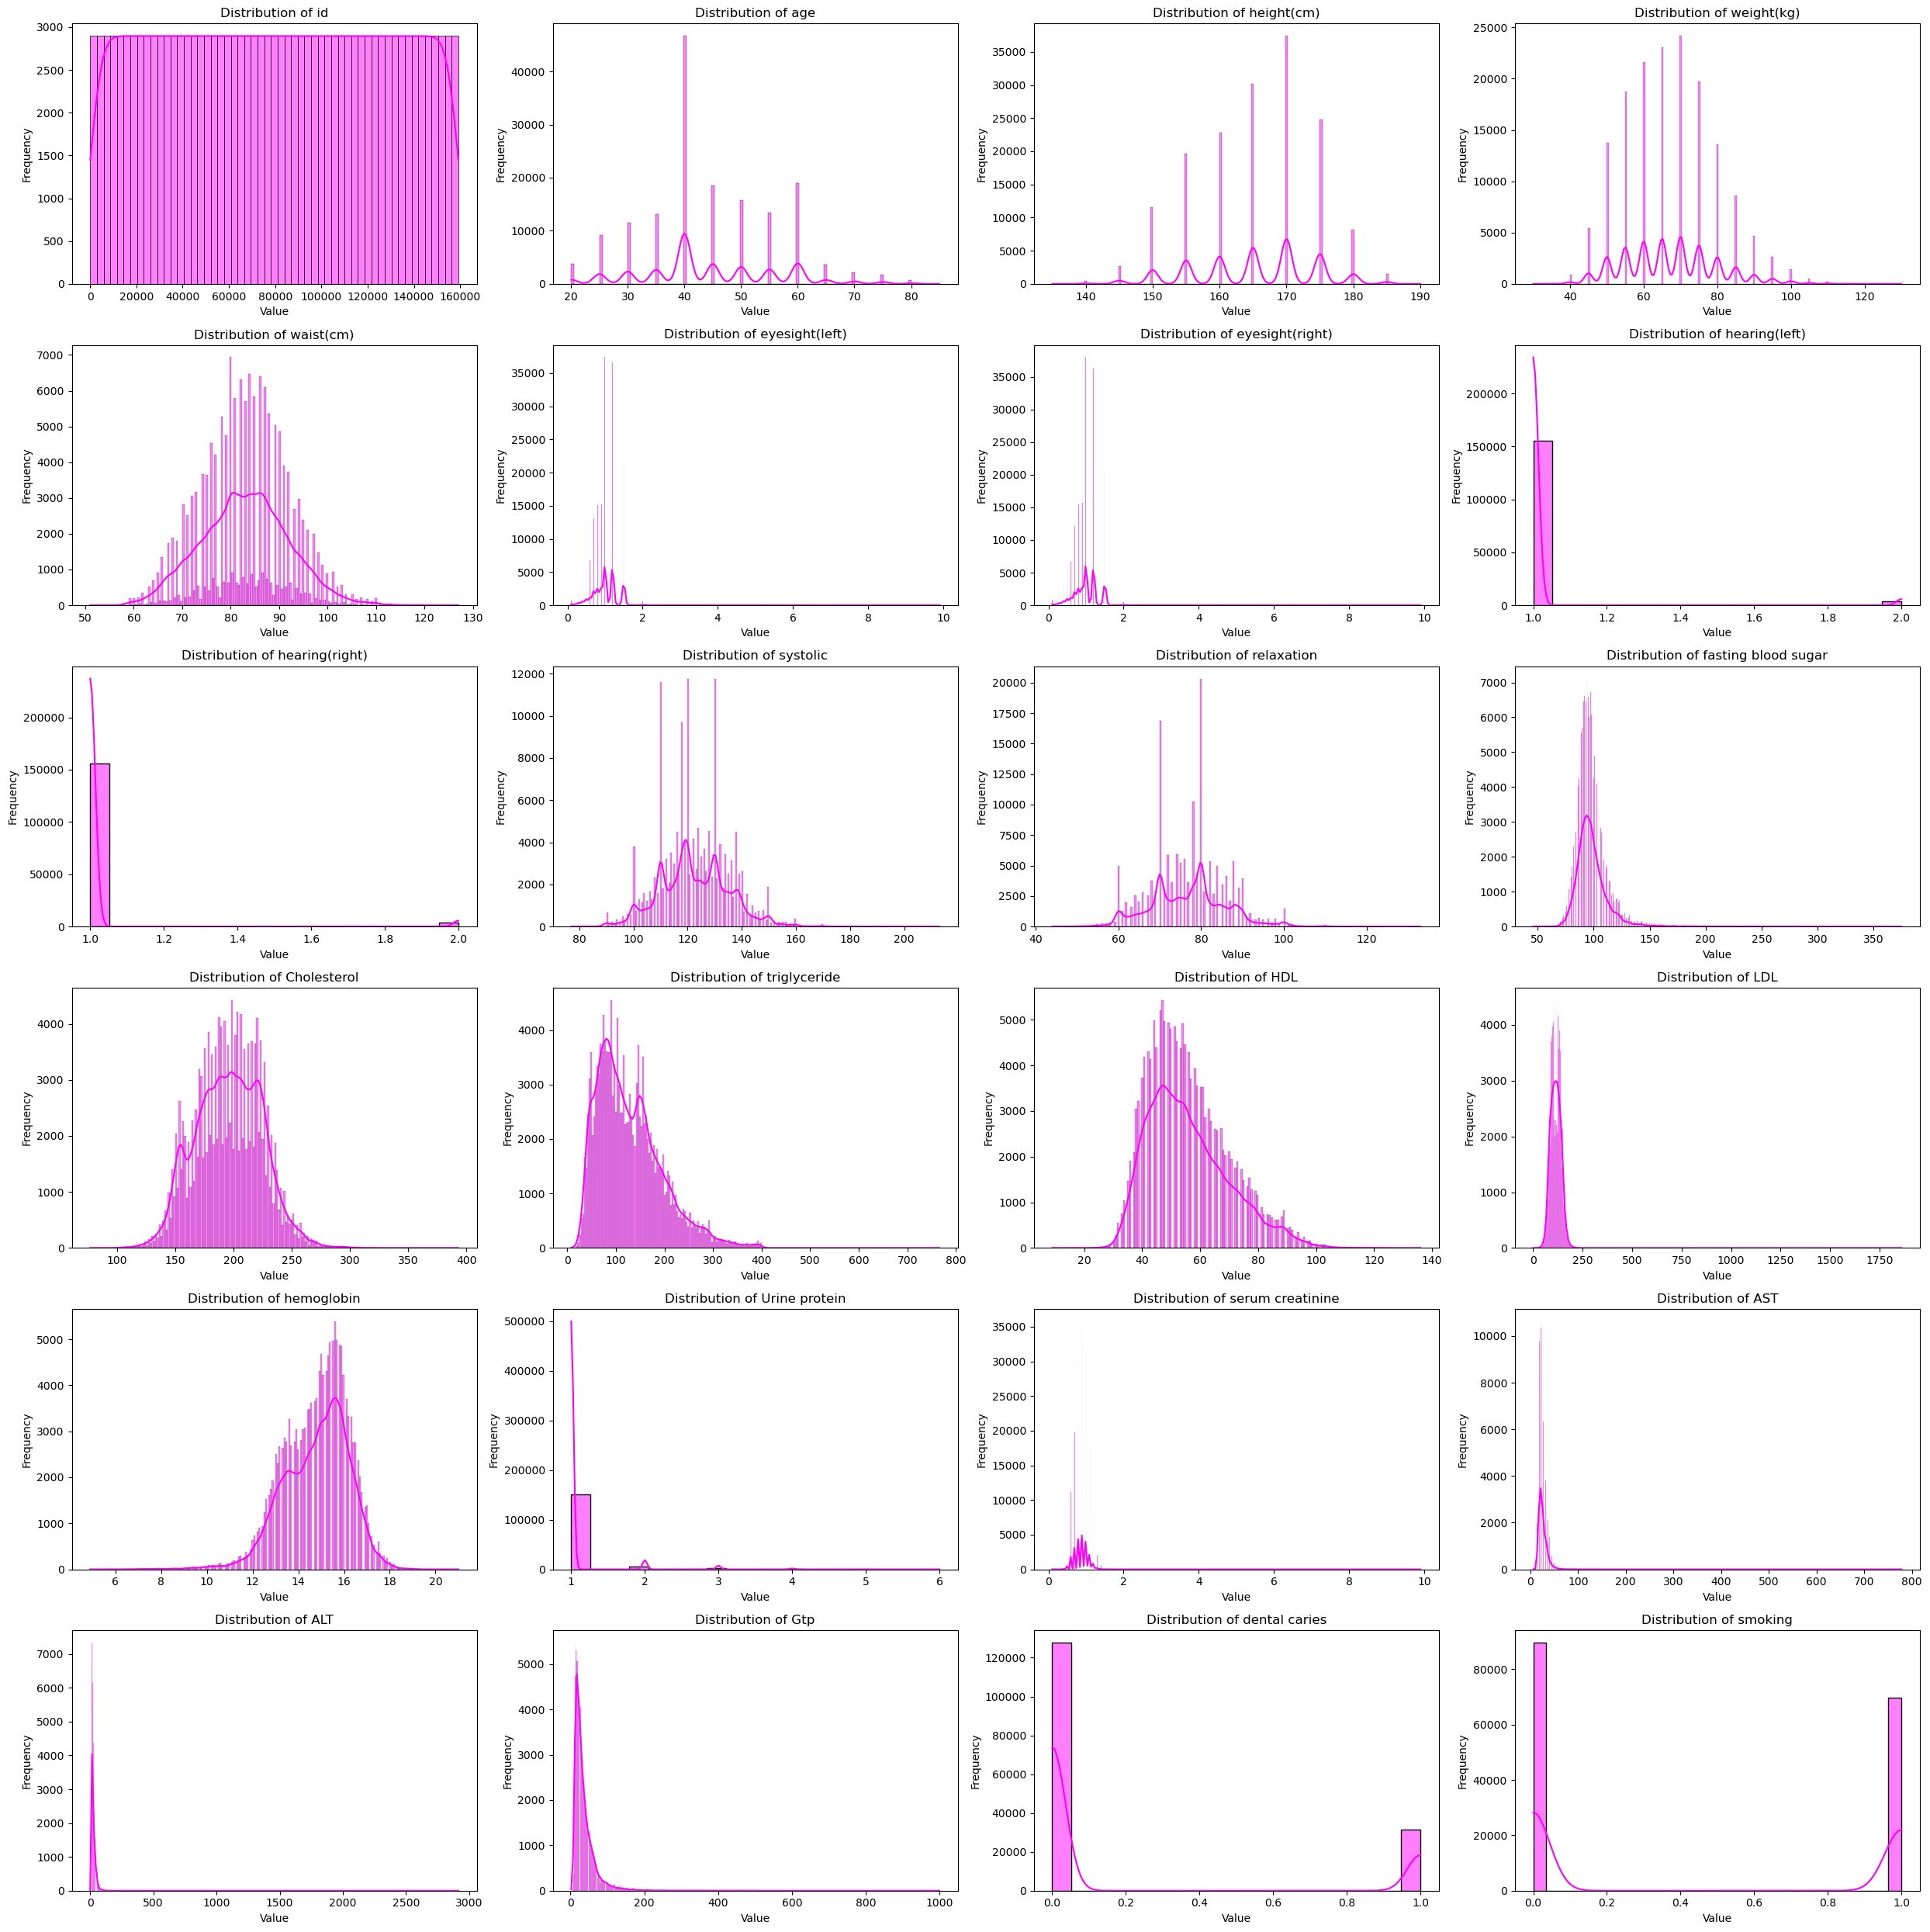

In [4]:
#HISTOGRAMA DE TODAS LAS VARIABLES

# Create a figure and axis for the subplots
fig, axes = plt.subplots(6,4, figsize=(25, 25))

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Loop through the numeric columns and create displot for each
for i, column in enumerate(df.columns):
    ax = axes[i]
    sns.histplot(df[column], ax=ax, kde=True, color="magenta")
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    
# If there are empty subplots, remove them
for i in range(len(df.columns), 6 * 4):
    fig.delaxes(axes[i])   
    
# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [5]:
df.drop(columns="id", inplace=True) #Elimino id que no sirve

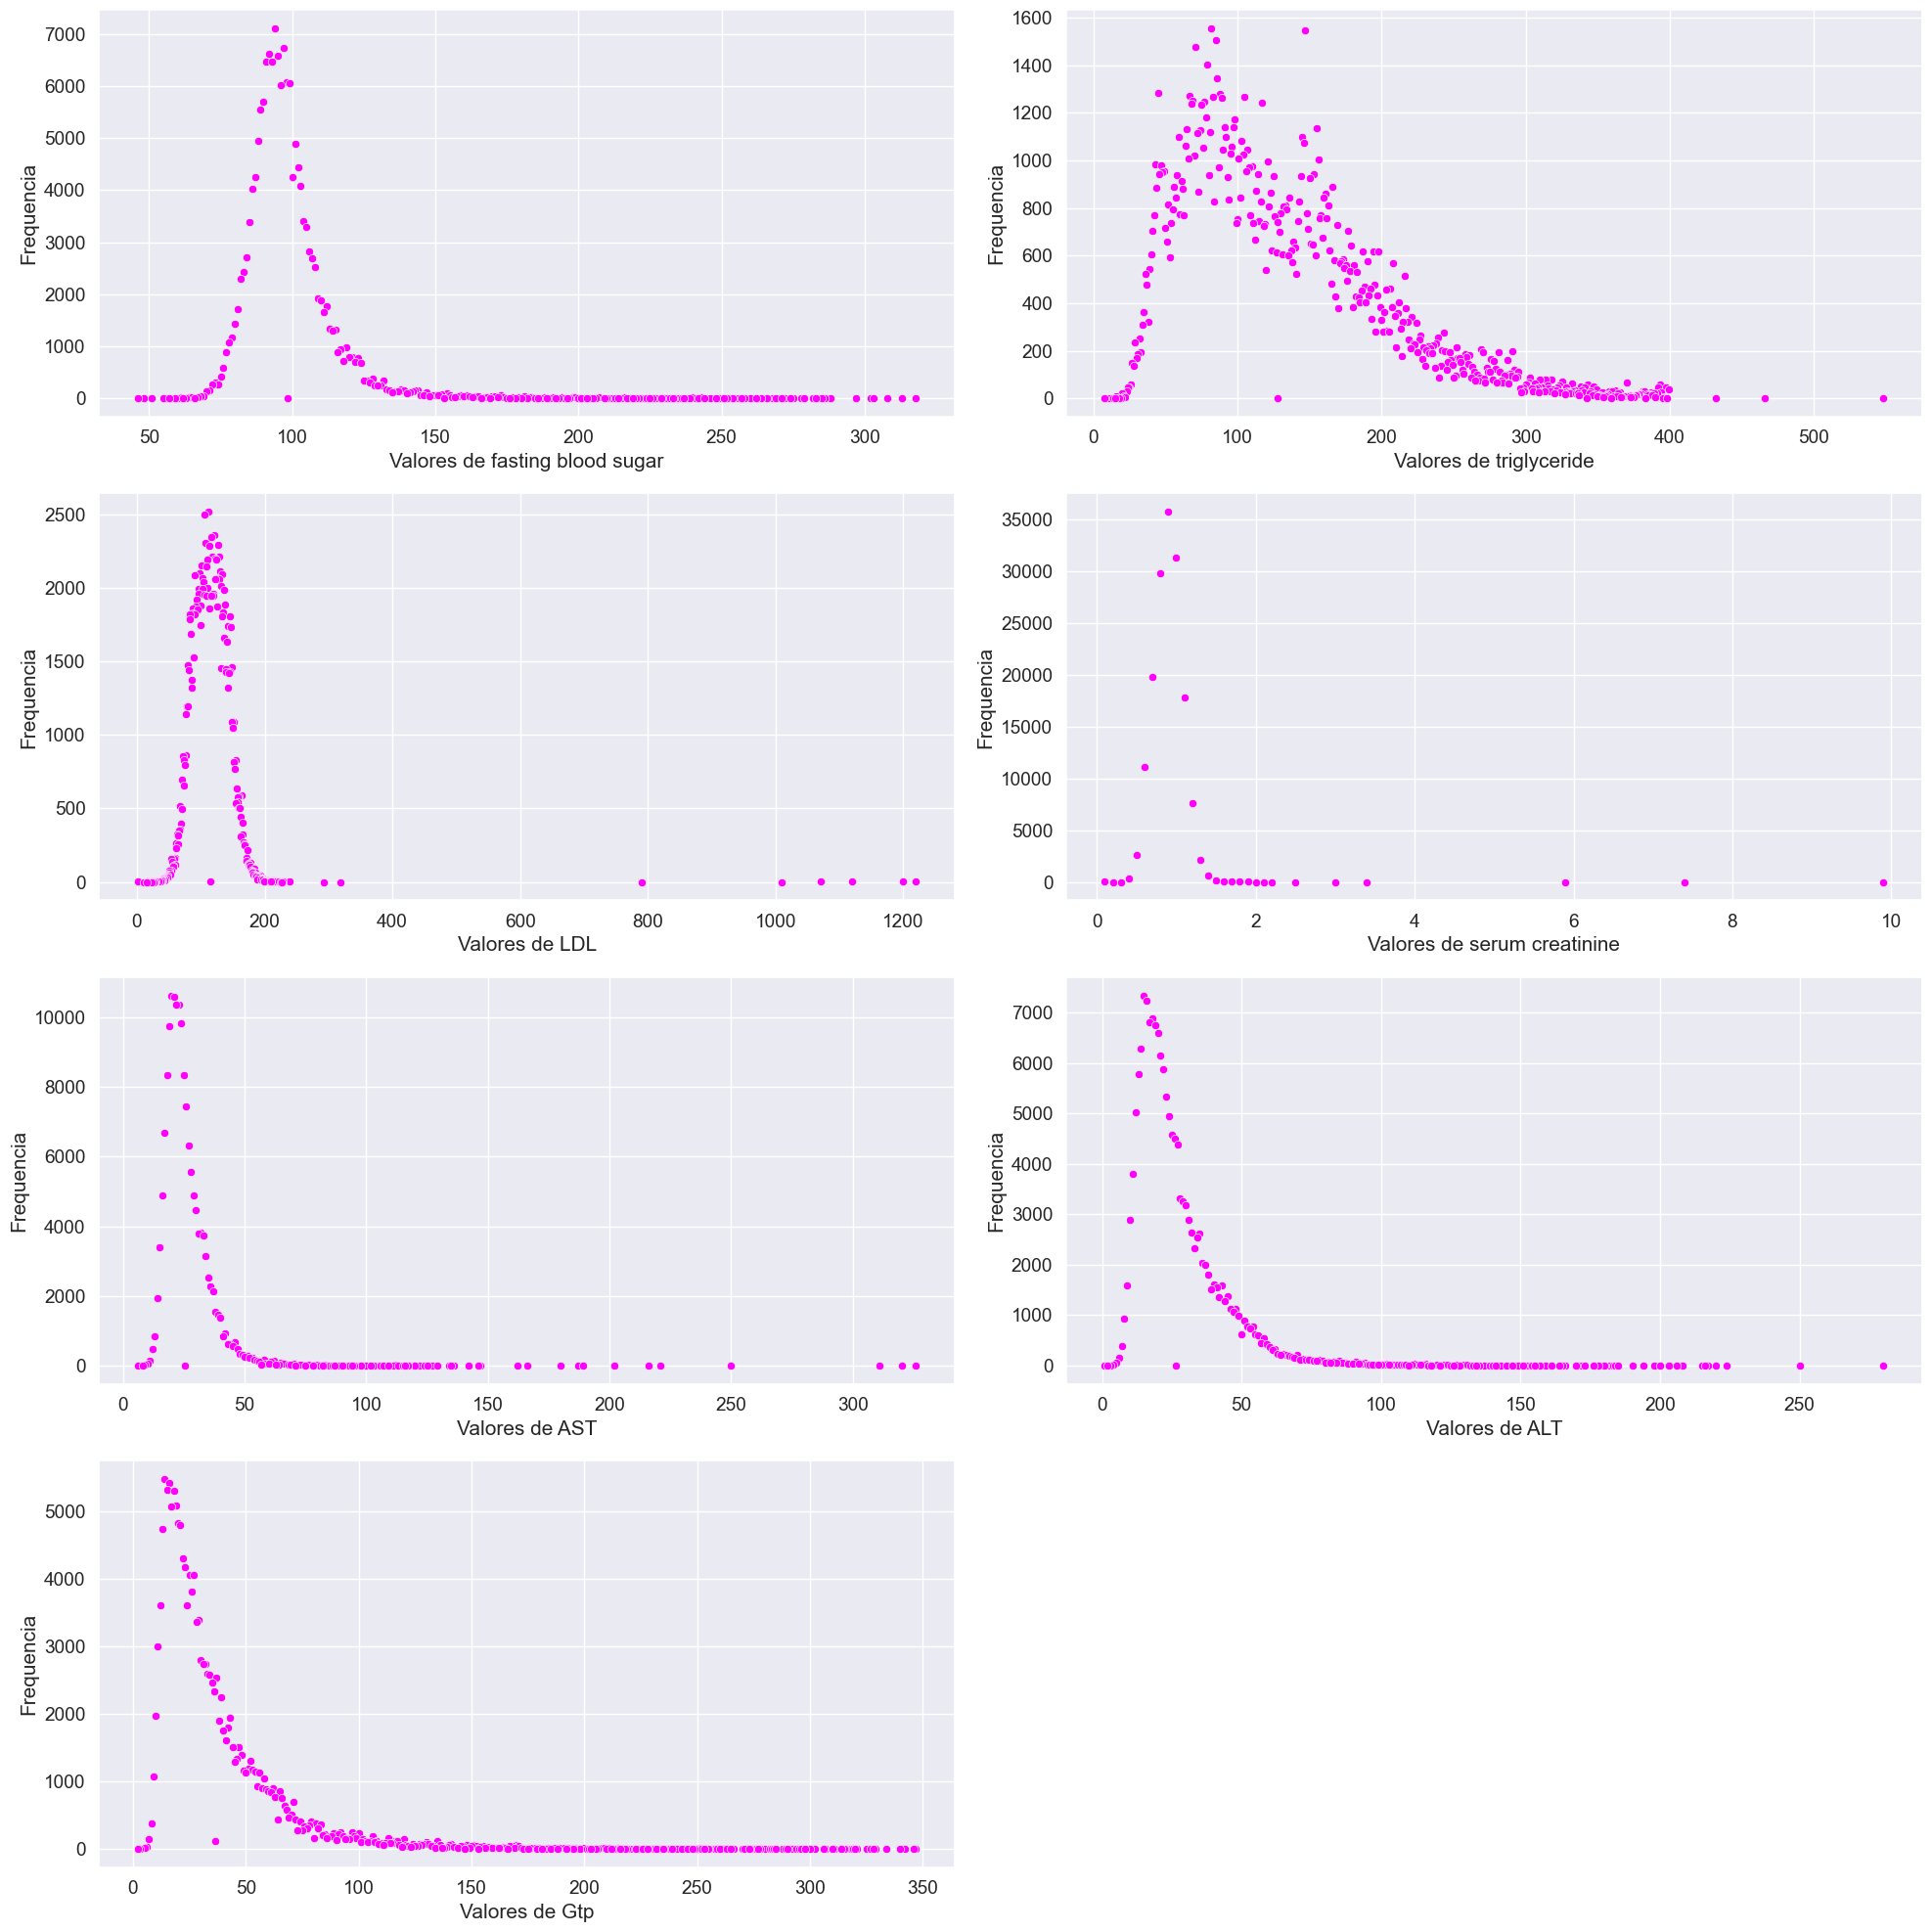

In [143]:
#VER LOS OUTLIERS PARA ELIMINAR LOS MÁS EXTREMOS

variables_outliers = ['fasting blood sugar','triglyceride','LDL','serum creatinine','AST', 'ALT', 'Gtp']
# Create a figure and axis for the subplots
fig, axes = plt.subplots(4,2, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Loop through the numeric columns and create displot for each
for i, column in enumerate(variables_outliers):
    value_counts = df[column].value_counts().reset_index()
    value_counts.columns = ['valor', 'recuento']
    ax = axes[i]
    sns.scatterplot(data=value_counts, x=value_counts['valor'], y=value_counts['recuento'], ax=ax, color='magenta')
    ax.set_xlabel(f'Valores de {column}')
    ax.set_ylabel('Frequencia')
    
# If there are empty subplots, remove them
for i in range(len(variables_outliers), 4 * 2):
    fig.delaxes(axes[i])   
    
# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [6]:
#ELIMINAMOS OUTLIERS Y SUSTITUIMOS POR LA MEDIA
df.loc[df["fasting blood sugar"]>350,"fasting blood sugar"] = df["fasting blood sugar"].mean()
df.loc[df["triglyceride"]>700,"triglyceride"] = df["triglyceride"].mean()
df.loc[df["LDL"]>1500,"LDL"] = df["LDL"].mean()
df.loc[df["serum creatinine"]>350,"serum creatinine"] = df["serum creatinine"].mean()
df.loc[df["AST"]>350,"AST"] = df["AST"].mean()
df.loc[df["ALT"]>350,"ALT"] = df["ALT"].mean()
df.loc[df["Gtp"]>350,"Gtp"] = df["Gtp"].mean()

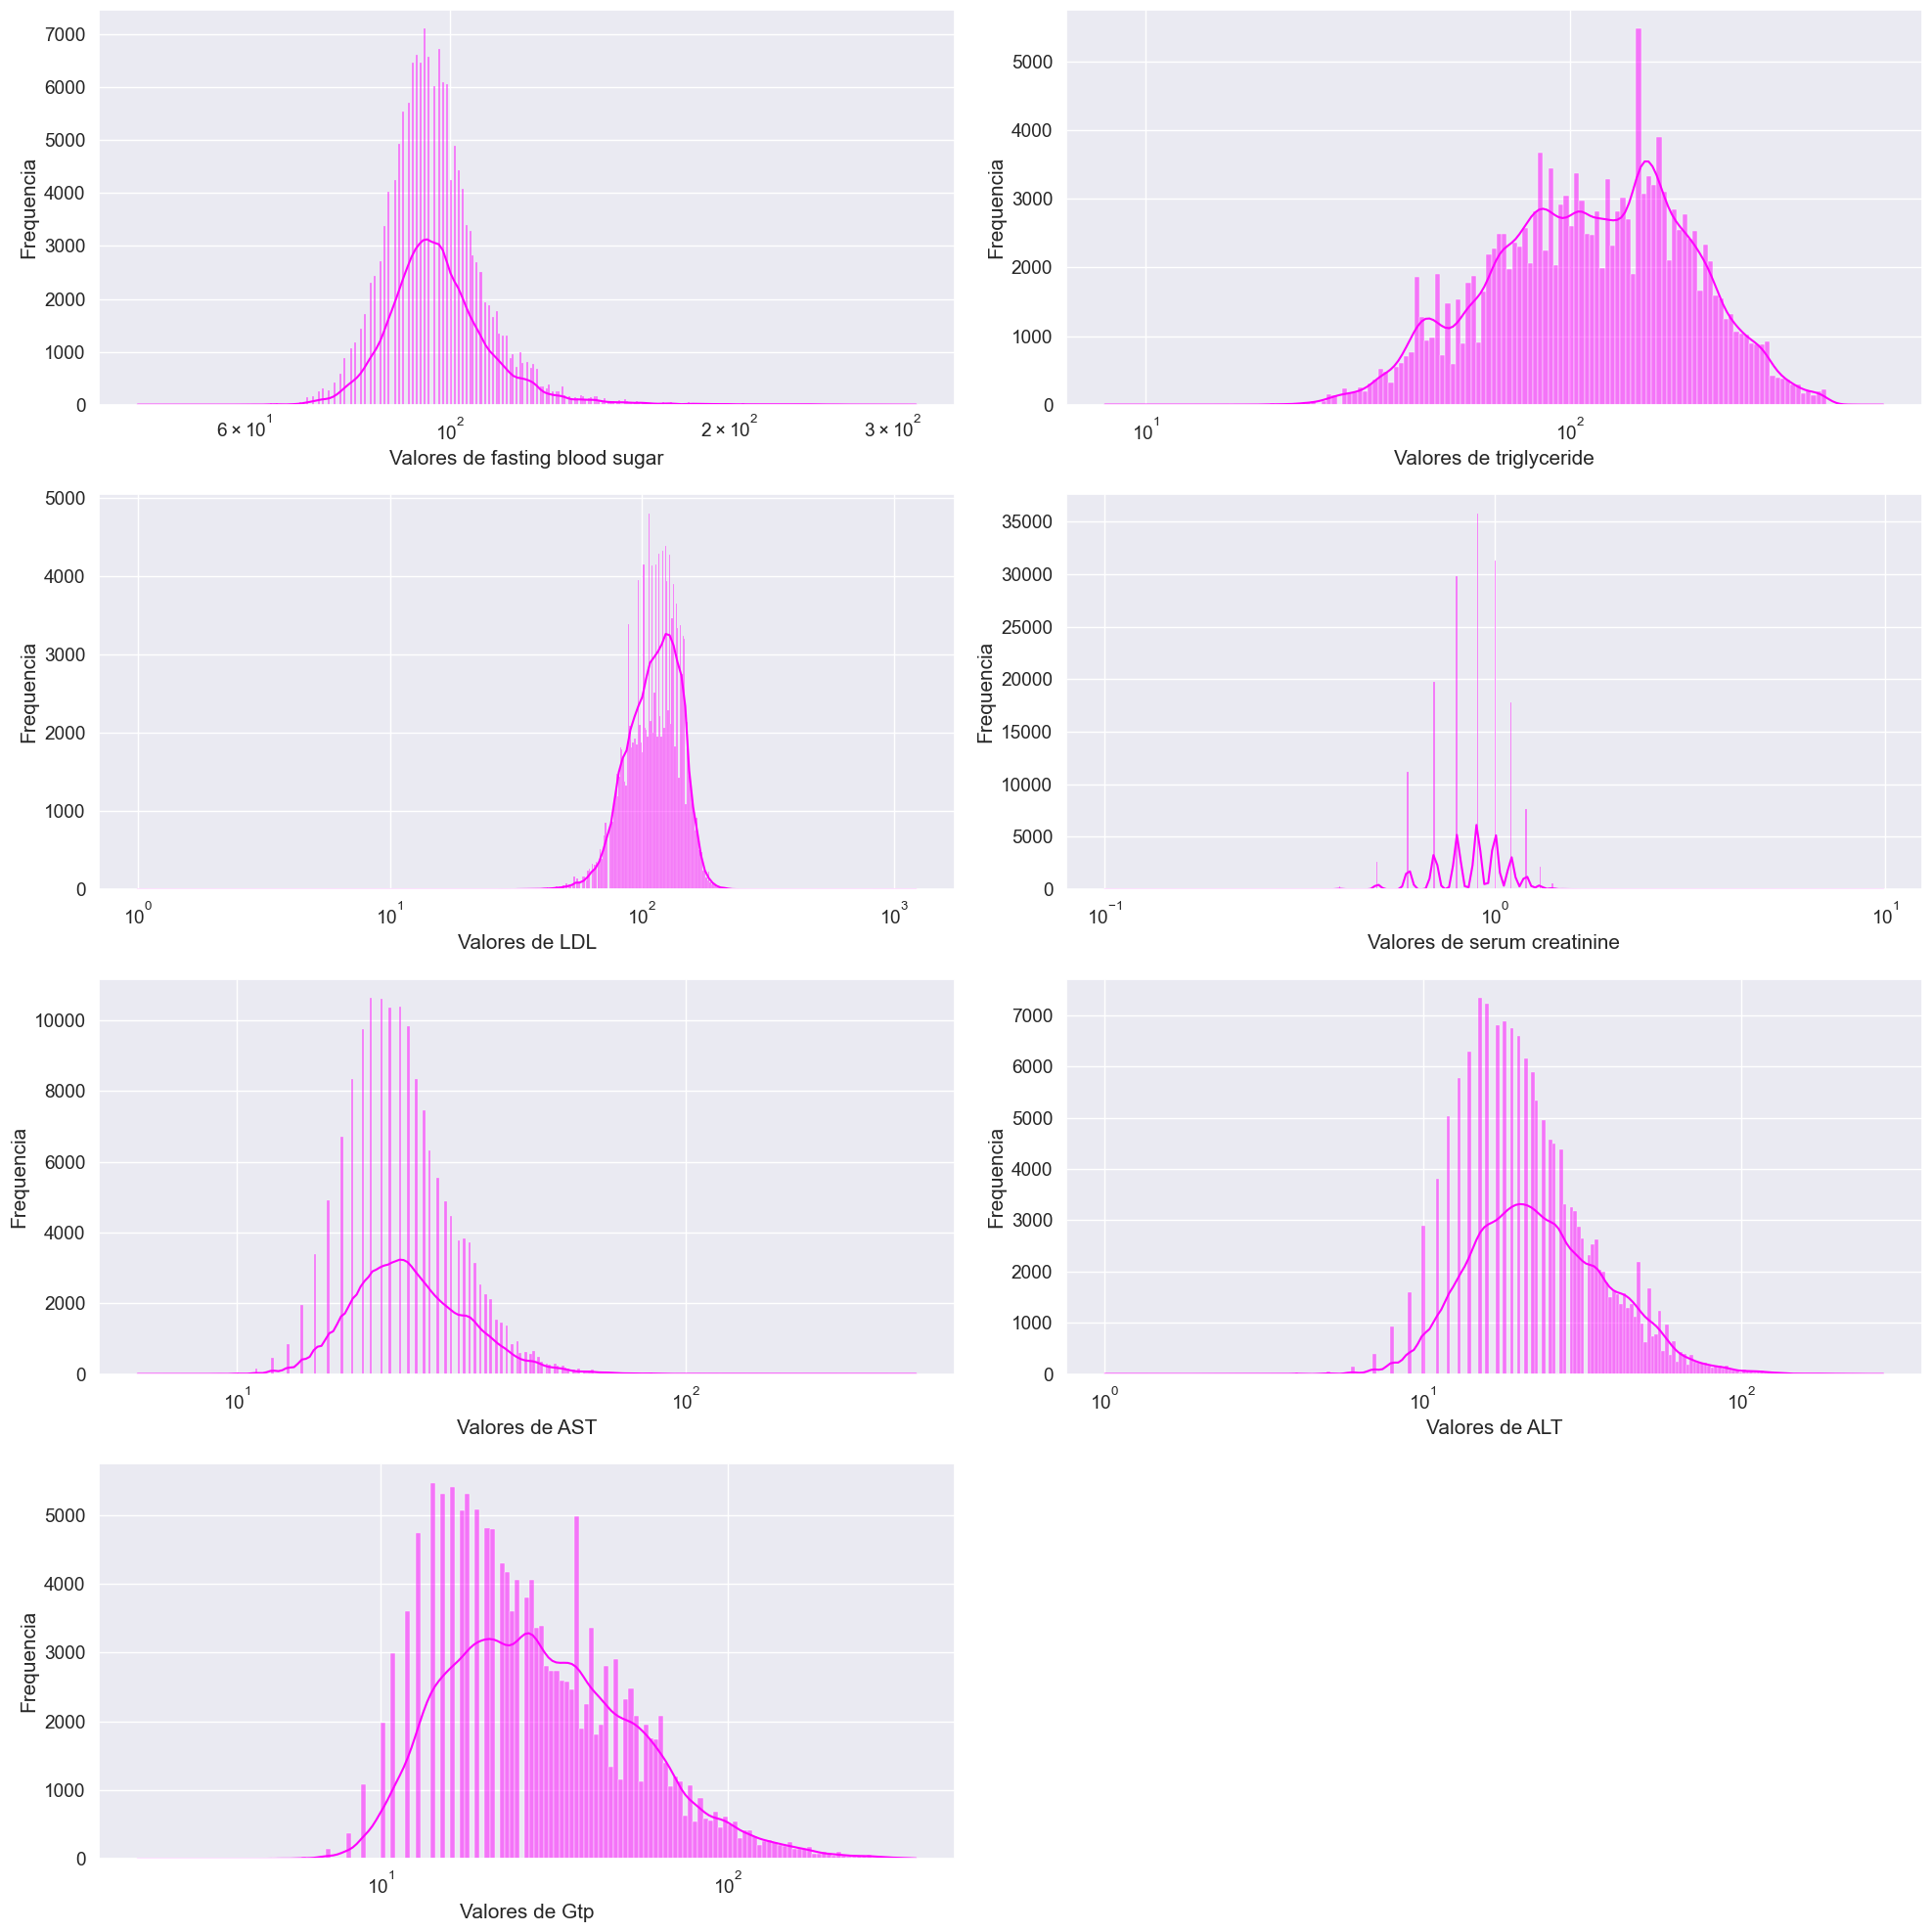

In [148]:
#GRÁFICOS PARA VER SI AL APLICAR LA ESCALA LOGARÍTMICA, LA DISTRIBUCIÓN CAMBIA

variables_outliers = ['fasting blood sugar','triglyceride','LDL','serum creatinine','AST', 'ALT', 'Gtp']
# Create a figure and axis for the subplots
fig, axes = plt.subplots(4,2, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Loop through the numeric columns and create displot for each
for i, column in enumerate(variables_outliers):
    ax = axes[i]
    sns.histplot(df[column], ax=ax, log_scale = True, kde=True, color="magenta")
    ax.set_xlabel(f'Valores de {column}')
    ax.set_ylabel('Frequencia')
    
# If there are empty subplots, remove them
for i in range(len(variables_outliers), 4 * 2):
    fig.delaxes(axes[i])   
    
# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [7]:
#APLICAMOS DISTRIBUCIÓN
df.loc[:,"fasting blood sugar"] = np.log(df["fasting blood sugar"])
df.loc[:,"triglyceride"] = np.log(df["triglyceride"])
df.loc[:,"LDL"] = np.log(df["LDL"])
df.loc[:,"serum creatinine"] = np.log(df["serum creatinine"])
df.loc[:,"AST"] = np.log(df["AST"])
df.loc[:,"ALT"] = np.log(df["ALT"])
df.loc[:,"Gtp"] = np.log(df["Gtp"])

/var/folders/b2/5t0x208x77v9tf8jkq6mvknr0000gp/T/ipykernel_98969/881463229.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = X.corr()


array(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine',
       'AST', 'ALT', 'Gtp', 'dental caries', 'smoking', 'IMC', 'eyesight',
       'eyesightlvl', 'hearing', 'IMC_cat', 'pressure', 'pressure_cat',
       'pulse_pressure', 'renal_funct'], dtype=object)

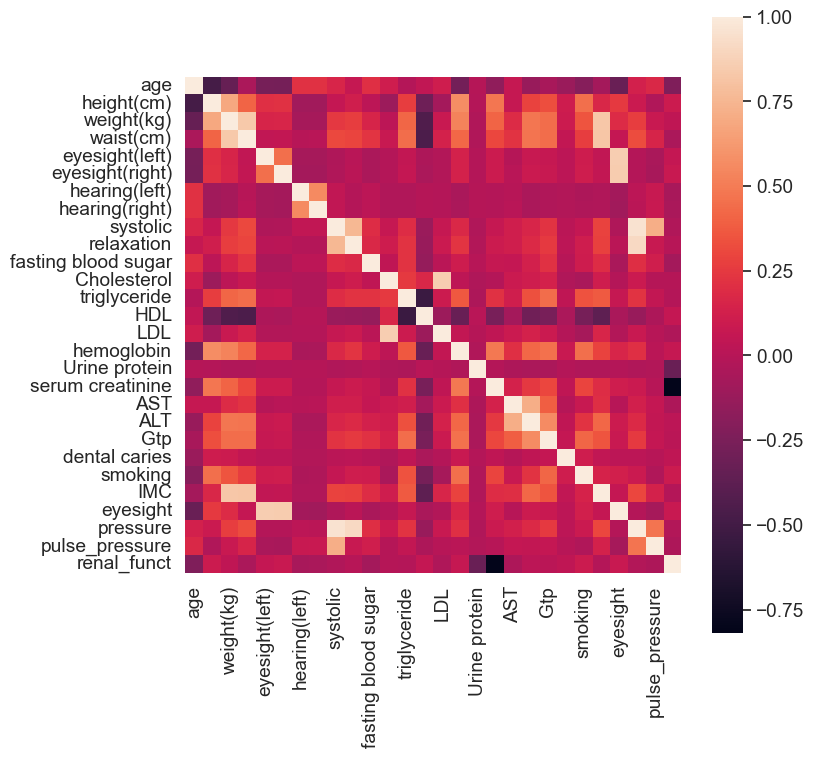

In [21]:
#PARA IR VIENDO CORRELACIONES SEGÚN HAGAMOS MODIFICACIONES

X = df
# correlacion y mapa de calor
plt.figure(figsize=(8,8))
corrmat = X.corr()
sns.heatmap(corrmat, square=True)
X.columns.values

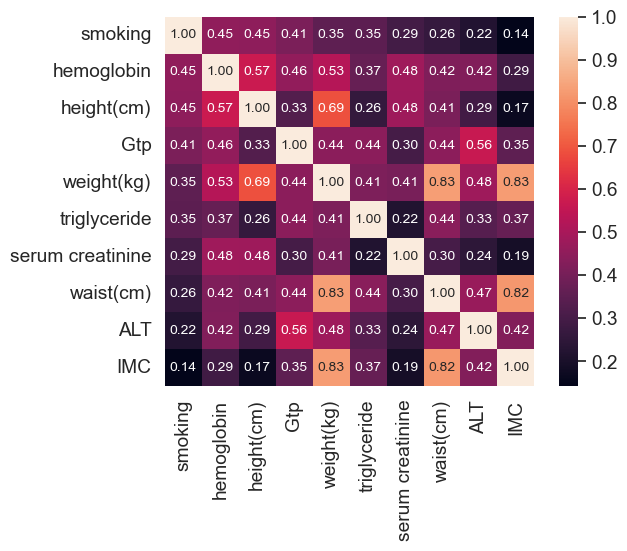

In [22]:
#PARA VER SI AL CREAR NUEVAS VARIABLES, SE CORRELACIONAN CON NUESTRA Y
k =10 #numero de variables
cols = corrmat.nlargest(k, 'smoking')['smoking'].index
cm = np.corrcoef(X[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [10]:
df["IMC"] = df["weight(kg)"]/((df["height(cm)"]/100)**2)

In [11]:
df['eyesight'] = (df['eyesight(right)'] + df['eyesight(left)'])/2

In [12]:
df['eyesightlvl'] = pd.cut(df.eyesight, bins=[0,0.56,1.11,5,10], labels=["a","b","c","d"])

In [13]:
df['hearing'] = (df['hearing(right)'] + df['hearing(left)'])/2

In [14]:
df["hearing"] = df["hearing"].replace(1.0,"no_sordo").replace(1.5,"medio_sordo").replace(2.0,"sordo")

In [15]:
df['IMC_cat'] = pd.cut(df.IMC, bins=[0,18.5,24.9,29.9,46], labels=["underweight","normal_weight","overweight","obese"])

In [16]:
df['pressure'] = df['systolic'] + df['relaxation']

In [17]:
df['pressure_cat'] = pd.cut(df.pressure, bins=[0,150,230,319], labels=['lowtension','normaltension','hightension'])

In [18]:
df['pulse_pressure'] = df['systolic'] - df['relaxation']

In [20]:
df['renal_funct'] = 186.3 * (df['serum creatinine'])**(-1.154) * (df['age'])**(-0.203) * (1/df['Urine protein'])

In [26]:
df['age_cat'] = pd.cut(df.age, bins=[20,35,50,65,90], labels=['joven','adulto','mayor','anciano'])

In [25]:
df.age.sort_values()

56028     20
105145    20
116588    20
67140     20
24823     20
          ..
899       85
62376     85
141119    85
144417    85
87250     85
Name: age, Length: 159256, dtype: int64

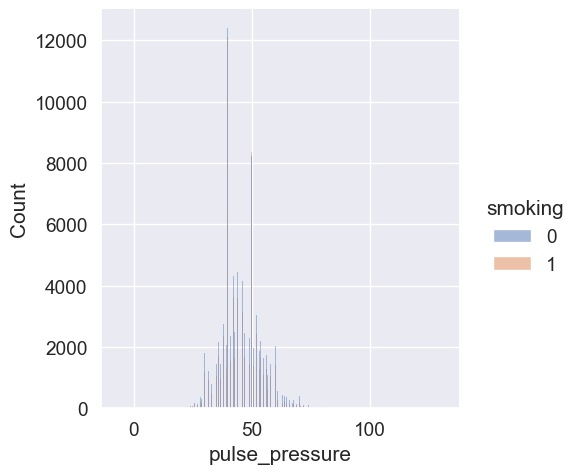

In [241]:
sns.displot(data=df, x=df['pulse_pressure'], hue="smoking")
plt.show()
#POCO RELEVANTE, LOS VALORES TIENEN MÁS O MENOS LOS MISMOS NÚMEROS

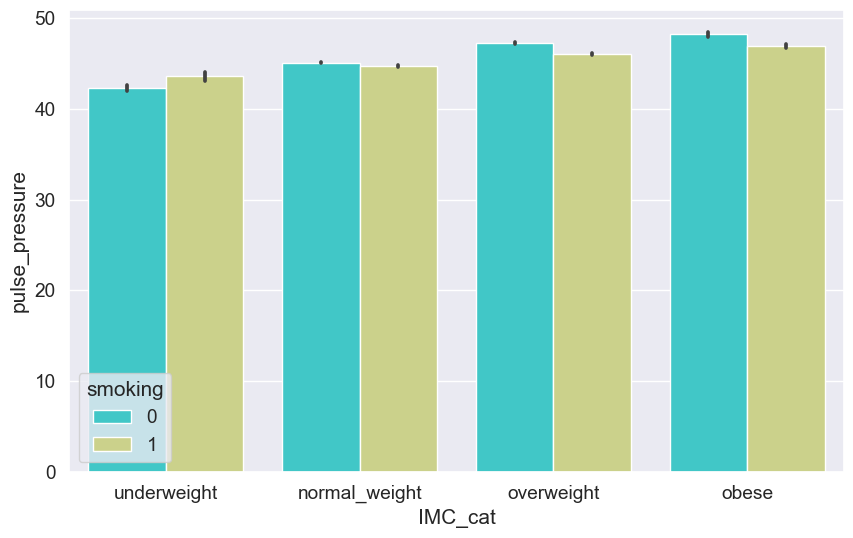

In [242]:
fig, ax = plt.subplots(figsize=(10,6)) # puedo utilizar matplotlib al mismo tiempo
sns.barplot(x="IMC_cat", y="pulse_pressure", hue="smoking", data=df, palette="rainbow")
plt.show()
#QUERÍA VER SI LOS GORDOS TENÍAN PEOR PULSE PRESSURE, PERO NO ES RELEVANTE

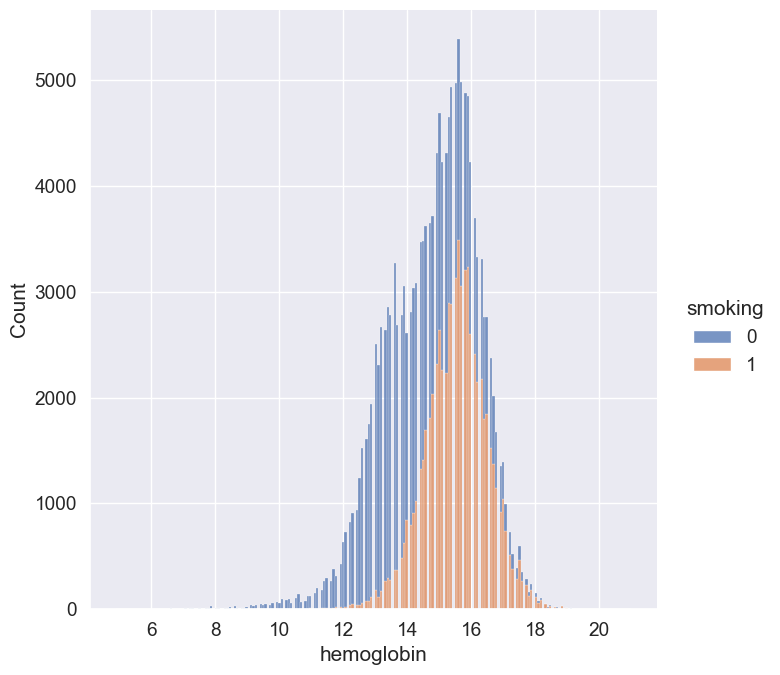

In [27]:
#PARA VALORES DE HEMOGLOBINA MÁS ALTOS, HABRÁ MÁS FUMADORES. Será interesante crear variables más correlacionadas.
sns.displot(data=df, x=df["hemoglobin"], hue='smoking',height=7, multiple='stack')
plt.show()

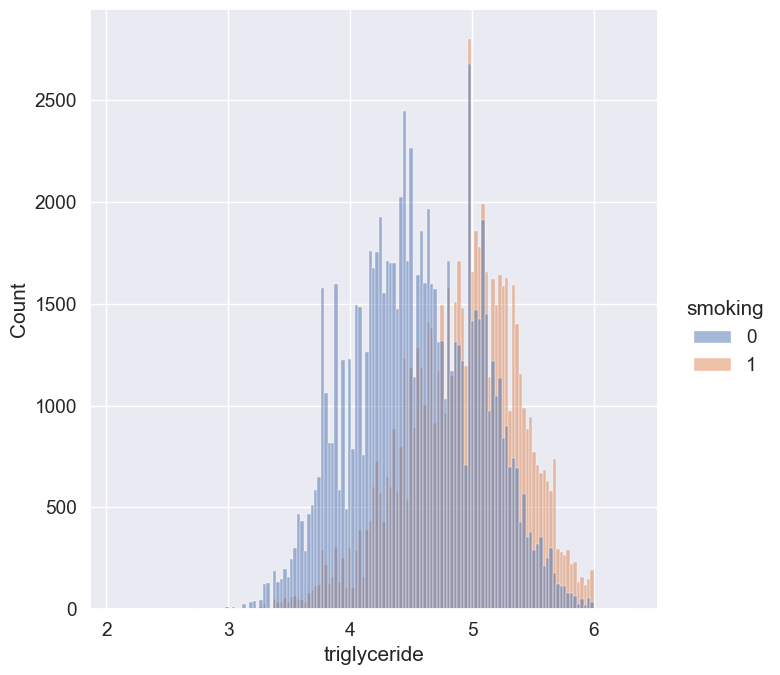

In [222]:
#PARA VALORES DE TRIGLICERIDOS MÁS ALTOS, HABRÁ MÁS FUMADORES. Será interesante crear variables más correlacionadas.
sns.displot(data=df, x=df["triglyceride"], hue='smoking',height=7)
plt.show()

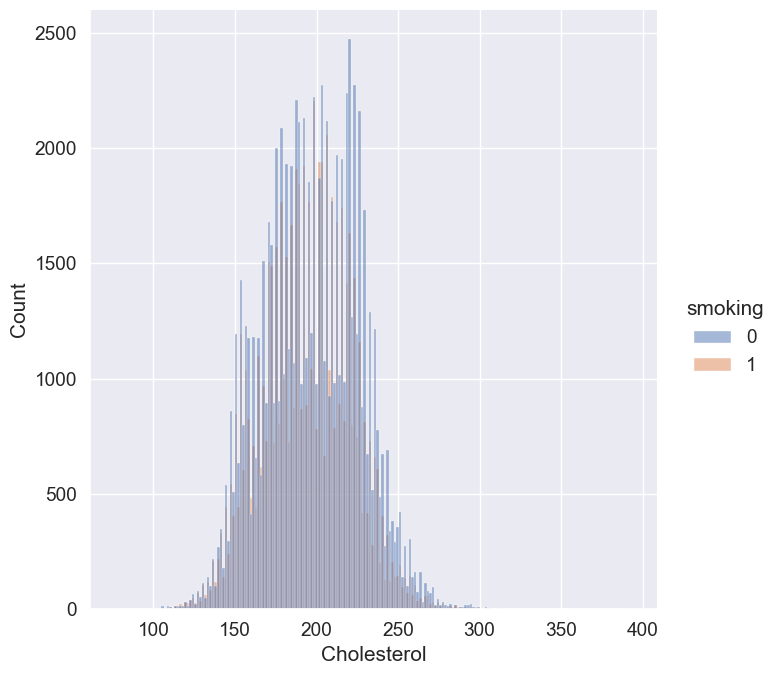

In [244]:
sns.displot(data=df, x=df["Cholesterol"], hue='smoking',height=7)
plt.show()
#FUMADORES Y NO FUMADORES TIENEN VALORES DE COLESTEROL PARECIDOS, NO PARECE MUY RELEVANTE

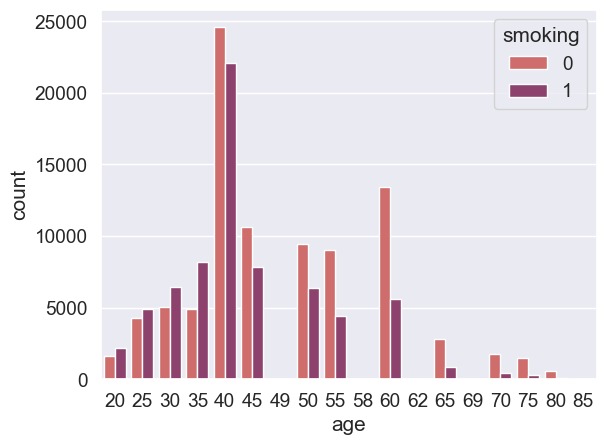

In [203]:
sns.countplot(x="age", 
              hue="smoking", 
              data=df, palette="flare") # nombre de la palette
plt.show()
#ESTO NOS HACE VER QUE SI ES MAYOR DE 50 HAY MENOS PROBABILIDADES DE QUE FUME

In [255]:
df['systolic']

0         135
1         146
2         118
3         131
4         121
         ... 
159251    127
159252    120
159253    114
159254    121
159255    125
Name: systolic, Length: 159256, dtype: int64

In [249]:
#METABOLIC HEALTH SCORE
dfm = df[['fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin']]

In [250]:
from sklearn.preprocessing import StandardScaler
objeto_escalador = StandardScaler() # cargo el objeto
objeto_escalador.fit(dfm) #le enseño la estructura y la media/varianza

StandardScaler()

In [251]:
dfm_scaler=objeto_escalador.transform(dfm) # aplico
dfm_scaled = pd.DataFrame(dfm_scaler, columns = dfm.columns)

In [253]:
df['met_hscore'] = dfm_scaled['fasting blood sugar']*(-0.2) + dfm_scaled['Cholesterol']*(0.1) + dfm_scaled['triglyceride']*(-0.1) + dfm_scaled['HDL']*(0.4) + dfm_scaled['LDL']*(-0.3) + dfm_scaled['hemoglobin']*(0.1)

In [220]:
Y = df["smoking"]
X = df.drop(columns=["smoking","hearing","eyesight","eyesightlvl"])

In [221]:
# Conseguir facilmente los p_values
import statsmodels.api as sm
X_i=sm.add_constant(X) # intercept de forma manual
logit_model=sm.Logit(np.array(Y), X_i)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.478635
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               159256
Model:                          Logit   Df Residuals:                   159232
Method:                           MLE   Df Model:                           23
Date:                Fri, 27 Oct 2023   Pseudo R-squ.:                  0.3015
Time:                        14:58:21   Log-Likelihood:                -76225.
converged:                       True   LL-Null:                   -1.0913e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -38.4995      1.176    -32.732      0.000     -40.805     -36.194
ag

In [18]:
sample_submission = pd.DataFrame({"id":df_test["id"], "smoking": df["smoking"].mean()}) #Crear dataframe final

In [20]:
sample_submission.to_csv("sample_submission.csv", encoding='utf-8', index=False) #Guardar dataframe final